# Метод опорных векторов (SVM)

В этом разделе мы демонстрируем, как линейный SVM находит оптимальную разделяющую гиперплоскость и строит «маржины» вокруг неё.


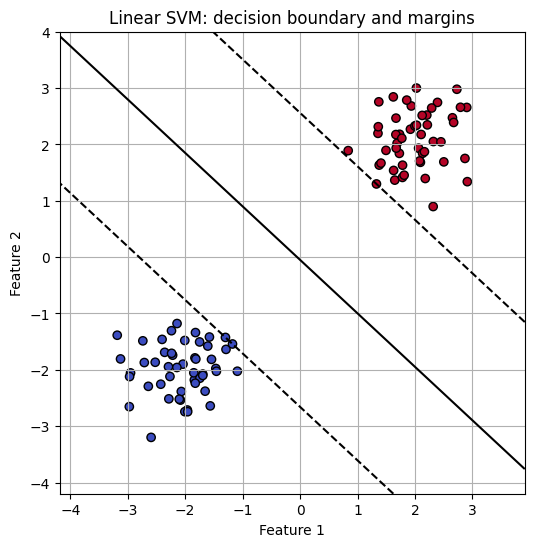

In [7]:
from core.svm.svm import train_linear_svm, plot_svm_boundary
import numpy as np

rng = np.random.default_rng(0)

X_pos = rng.normal(loc=[2,2], scale=0.5, size=(50,2))
X_neg = rng.normal(loc=[-2,-2], scale=0.5, size=(50,2))

X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(50), np.zeros(50)])

model = train_linear_svm(X, y, C=1.0, random_state=42)

plot_svm_boundary(model, X, y)


---

## ⚙️ Используемые функции

| Функция               | Описание                                                             | Параметры                          |
|-----------------------|----------------------------------------------------------------------|------------------------------------|
| **train_linear_svm**  | Обучает линейный SVM (SVC с `kernel='linear'`) на данных `(X, y)`    | `C=1.0`, `random_state=42`         |
| **plot_svm_boundary** | Строит разделяющую гиперплоскость и марджины на плоскости признаков  | `resolution=200` (по умолчанию)    |

---

## 📊 Конфигурация эксперимента

- **Данные**
  - Положительный класс: 50 точек из \(\mathcal{N}([2,2],\,0.5^2)\)
  - Отрицательный класс: 50 точек из \(\mathcal{N}([-2,-2],\,0.5^2)\)
- **Метки:** положительный = 1, отрицательный = 0
- **Гиперпараметр регуляризации:** \(C = 1.0\)

---

## 📈 Визуализация

- **Сплошная линия** \(\{w^T x + b = 0\}\) — разделяющая гиперплоскость.
- **Штриховые линии** \(\{w^T x + b = \pm1\}\) — границы «маржина».
- Расстояние между штриховыми линиями соответствует удвоенному запасу (margin).

---

## 🧠 Выводы

- **Гиперплоскость** надёжно разделяет два кластера:
  по одну сторону — точки вокруг \((2,2)\), по другую — вокруг \((-2,-2)\).
- **Маржины** показывают запас до ближайших опорных векторов:
  точки, лежащие на штриховых линиях, являются опорными.
- Параметр **\(C=1.0\)** обеспечивает баланс между шириной маржина и штрафом за ошибки:
  - При большем \(C\) модель бы сузила маржин, жертвуя обобщающей способностью.
  - При меньшем \(C\) маржин расширился бы, допуская больше ошибок на обучении.
